# Find the GT Board in a Video Image
- Testing on Botez Video

In [2]:
import cv2
import matplotlib.pylab as plt
import numpy as np
from glob import glob
import sys

sys.path.append("../src/")
from detect_gt import add_edges

In [3]:
%matplotlib inline

In [4]:
%load_ext lab_black
plt.style.use("ggplot")

# Use Video Extractor

In [5]:
from label_extract import VideoBoardExtractor

In [6]:
vbe = VideoBoardExtractor(
    video_fn="../data/Botez/mnxJQaxybWQ.mp4",
    at_first_gt_frame=True,
    predict_fen=True,
    store_gt_boards=True,
    store_irl_boards=True,
    store_irl_video=True,
    save_img_freq=1200,
    gt_board_loc=[5, 290, 5, 290],
    irl_board_loc=[420, 720, 350, 930],
)

	 Loading model '../tensorflow_chessbot/saved_models/frozen_graph.pb'
	 Model restored.


In [7]:
vbe.load_videocap()

In [8]:
vbe.process_video(start_frame=2000, stop_frame=2500)

<VideoCapture 0x7ffb0ef03930>


100%|█████████▉| 2499/2500 [00:18<00:00, 138.21it/s]


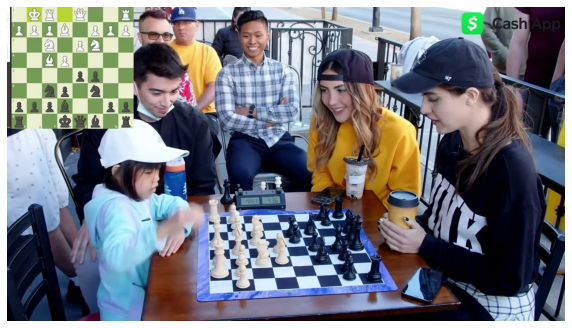

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(cv2.cvtColor(vbe.this_frame_img, cv2.COLOR_BGR2RGB))
ax.axis("off")
plt.show()

(-0.5, 284.5, 284.5, -0.5)

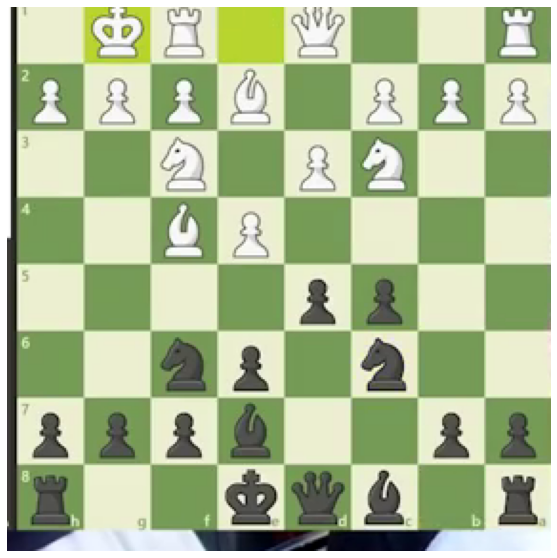

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(cv2.cvtColor(vbe.gt_board, cv2.COLOR_BGR2RGB))
ax.axis("off")

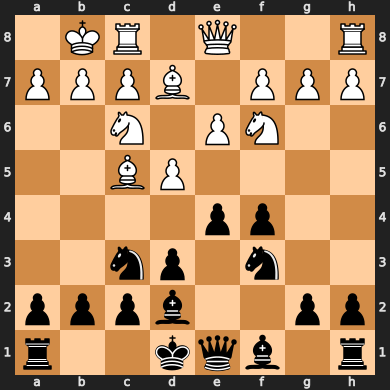

In [16]:
import chess

chess.Board(vbe.fens[2500])

In [17]:
vbe.irl_board.shape

(300, 580, 3)

(-0.5, 579.5, 299.5, -0.5)

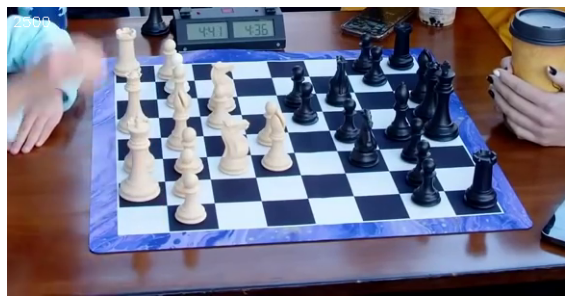

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cv2.cvtColor(vbe.irl_board, cv2.COLOR_BGR2RGB))
ax.axis("off")

# Pull the IRL Board

In [19]:
example_img = cv2.imread("../data/processed/nxJQaxybWQ/imgs/1200.png")

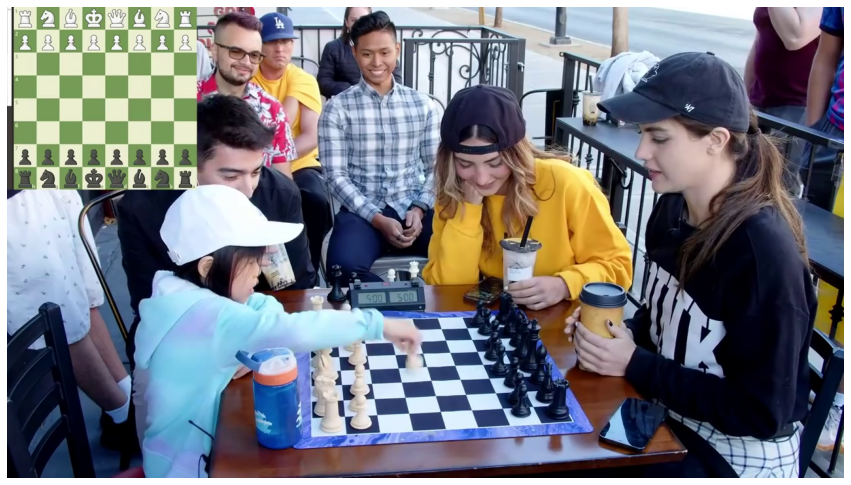

In [20]:
example_img_ = cv2.cvtColor(example_img, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(example_img_)
ax.axis("off")
plt.show()

# Square Detection with CV2

(-0.5, 1279.5, 719.5, -0.5)

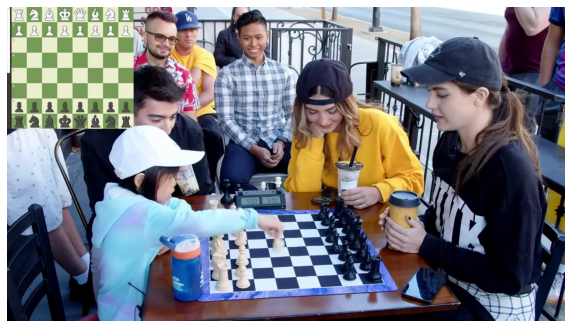

In [74]:
import cv2
import numpy as np

example_img = cv2.imread("../data/processed/nxJQaxybWQ/imgs/1200.png")

# Load image, grayscale, median blur, sharpen image
image = example_img


def get_squares(
    image, thres_low=160, thres_high=255, min_area=10, max_area=200_000_000
):

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.medianBlur(gray, 5)
    sharpen_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    sharpen = cv2.filter2D(blur, -1, sharpen_kernel)

    # Threshold and morph close
    thresh = cv2.threshold(sharpen, thres_low, thres_high, cv2.THRESH_BINARY)[1]
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Find contours and filter using threshold area
    cnts = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    image_number = 0
    for c in cnts:
        area = cv2.contourArea(c)
        if area > min_area and area < max_area:
            x, y, w, h = cv2.boundingRect(c)
            ROI = image[y : y + h, x : x + w]
            cv2.imwrite("ROI_{}.png".format(image_number), ROI)
            cv2.rectangle(image, (x, y), (x + w, y + h), (36, 255, 12), 2)
            image_number += 1
    return image, close, cnts


fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax.axis("off")

In [62]:
# fig, ax = plt.subplots()
# ax.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
# ax.axis("off")

From 180 -> 185


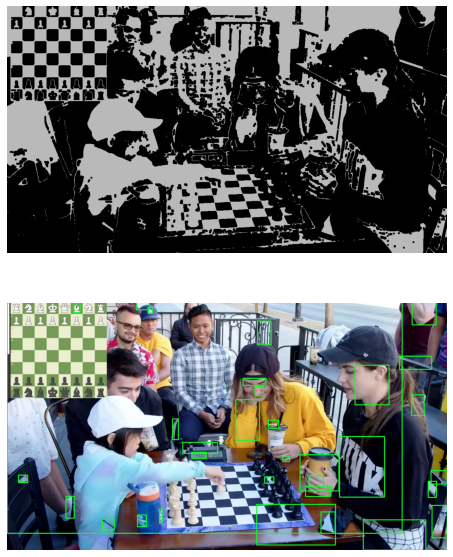

From 185 -> 190


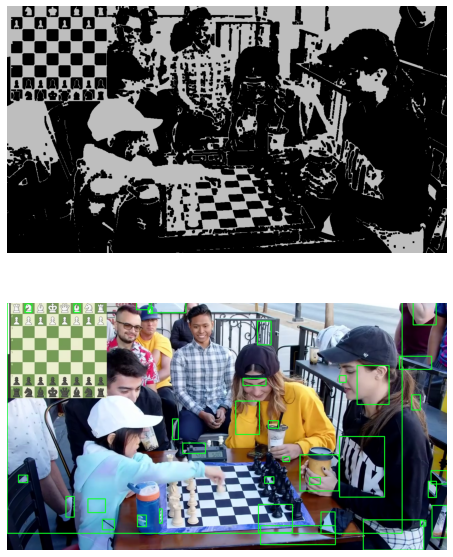

From 190 -> 195


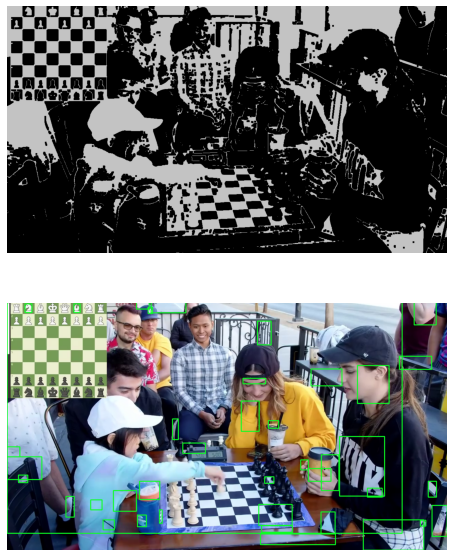

From 195 -> 200


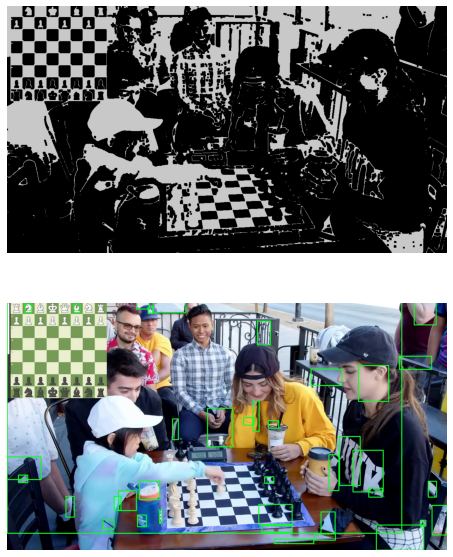

From 200 -> 205


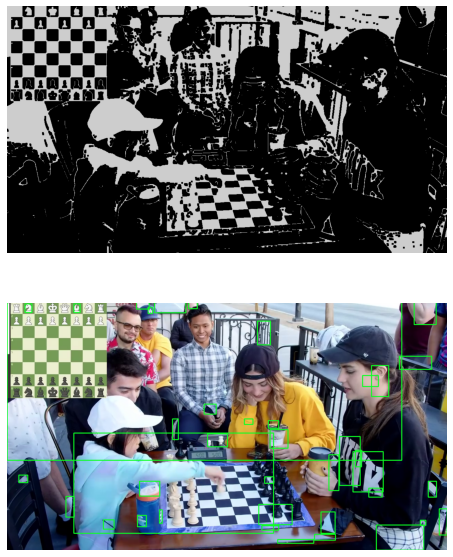

From 205 -> 210


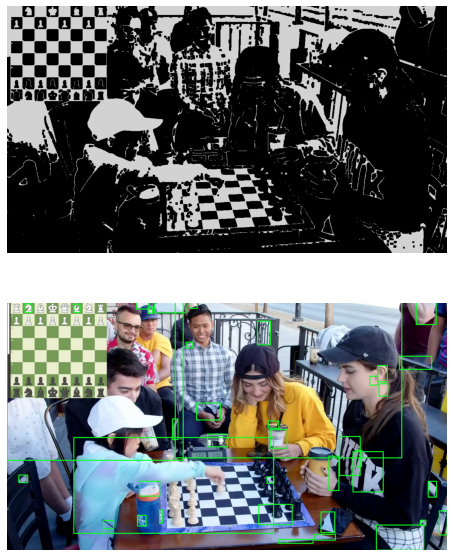

From 210 -> 215


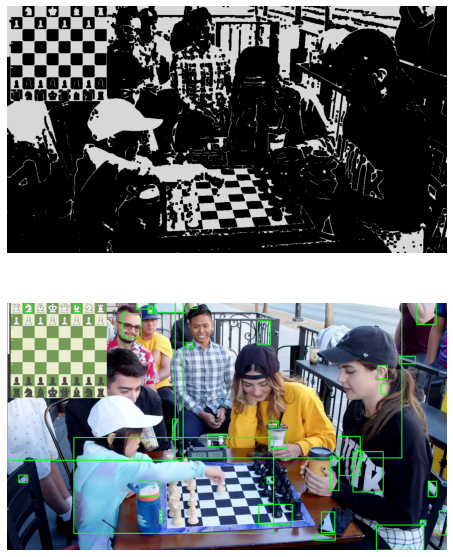

From 215 -> 220


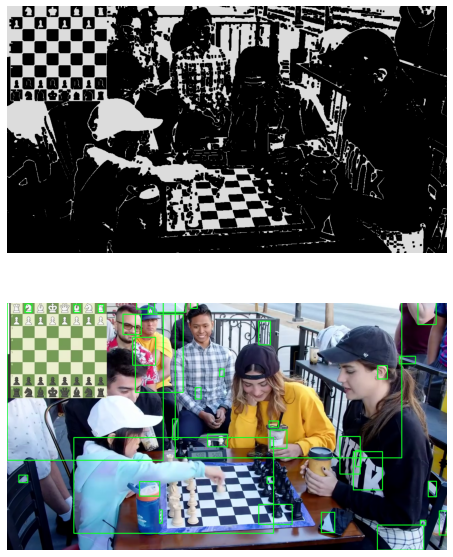

From 220 -> 225


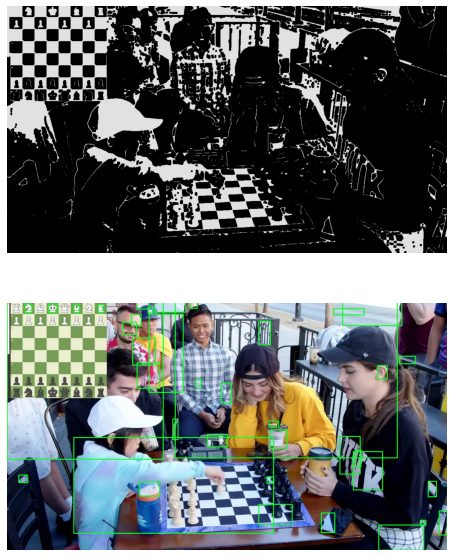

From 225 -> 230


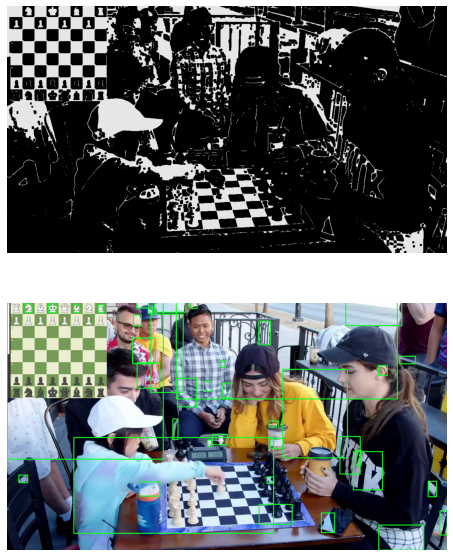

From 230 -> 235


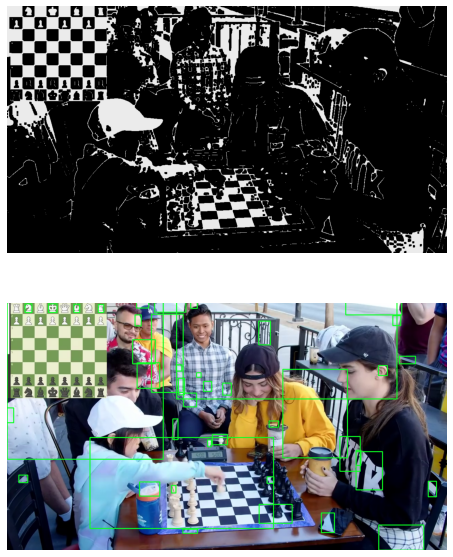

From 235 -> 240


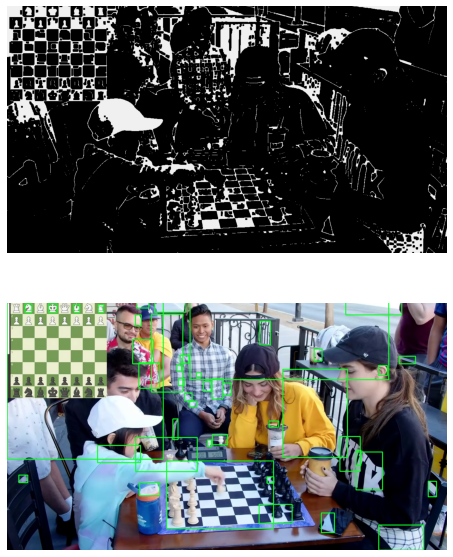

From 240 -> 245


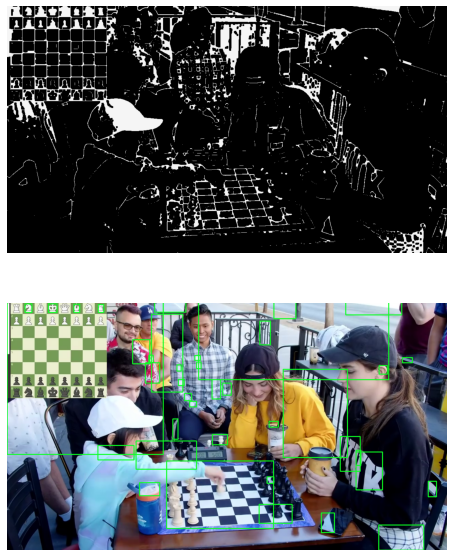

From 245 -> 250


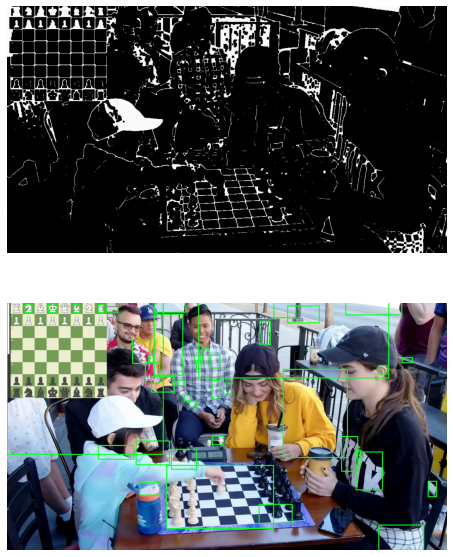

From 250 -> 255


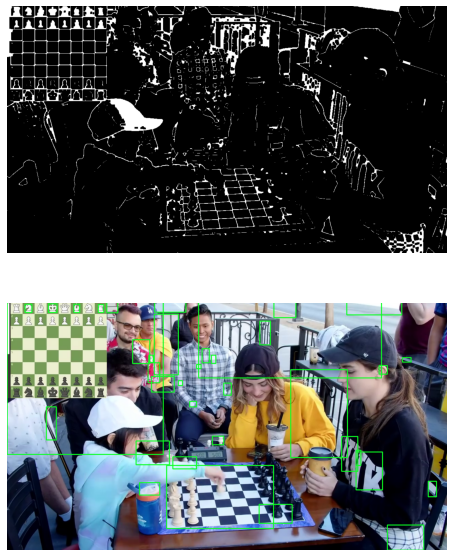

In [88]:
for x in range(180, 255, 5):
    example_img = cv2.imread("../data/processed/nxJQaxybWQ/imgs/1200.png")
    print(f"From {x} -> {x+5}")
    image, close, cnts = get_squares(
        example_img, thres_low=x, thres_high=x + 5, min_area=100
    )
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))
    axs[0].imshow(cv2.cvtColor(close, cv2.COLOR_BGR2RGB))
    axs[1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[0].axis("off")
    axs[1].axis("off")
    plt.show()